# 머신러닝

단일 분류 예측
- Logistic Regression
- KNN
- Decision Tree

앙상블(Ensemble) 모델
- Random Forest
- XGBoost
- LGBM
- Stacking
- Weighted Blending

## 머신러닝 모델 프로세스
1. 라이브러리 임포트
2. 데이터 가져오기
3. 탐색적 데이터 분석
4. 데이터 전처리(타입변환, Null처리, 더미생성, 특성추출 등)
5. Train, Test 분할
6. 데이터 정규화
7. 모델 개발
8. 모델 성능 평가

### 1. 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. 데이터 로드
+ 고객등급(class), 성별(sex), 나이(age), 사용서비스수(service), 서비스중지여부 (stop), 미납여부(npay)
+ 3개월 평균 요금(avg_bill), A서비스 3개월 평균요금(A_bill), B서비스 3개월 평균요금(B_bill), 해지여부(termination)

In [2]:
df = pd.read_csv('cust_data.csv')

### 3. 데이터 분석

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7827 non-null   object 
 1   sex          8753 non-null   object 
 2   age          8753 non-null   int64  
 3   service      8753 non-null   int64  
 4   stop         8753 non-null   object 
 5   npay         8753 non-null   object 
 6   avg_bill     8753 non-null   float64
 7   A_bill       8753 non-null   float64
 8   B_bill       8753 non-null   float64
 9   termination  8753 non-null   object 
 10  by_age       8753 non-null   int64  
 11  bill_rating  8753 non-null   object 
 12  low          8753 non-null   int64  
 13  lowmid       8753 non-null   int64  
 14  mid          8753 non-null   int64  
 15  midhigh      8753 non-null   int64  
 16  high         8753 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 1.1+ MB


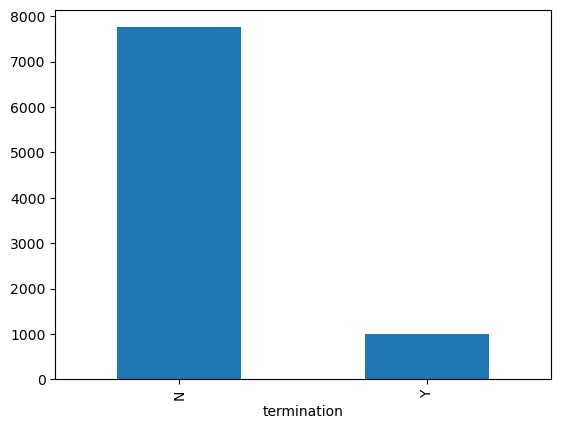

In [4]:
df['termination'].value_counts().plot(kind='bar')
plt.show()

### 4. 데이터 전처리
- object col을 `get_dummies`를 사용해 원핫인코딩

In [5]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']

In [6]:
df1 = pd.get_dummies(data=df,columns=cal_cols,drop_first=True)

In [7]:
df1.shape

(8753, 24)

### 5. Train, Test Split

In [8]:
df1.columns

Index(['age', 'service', 'avg_bill', 'A_bill', 'B_bill', 'by_age', 'low',
       'lowmid', 'mid', 'midhigh', 'high', 'class_D', 'class_E', 'class_F',
       'class_G', 'class_H', 'sex_M', 'stop_Y', 'npay_Y', 'termination_Y',
       'bill_rating_low', 'bill_rating_lowmid', 'bill_rating_mid',
       'bill_rating_midhigh'],
      dtype='object')

In [9]:
df1 = df1.drop(['low','lowmid', 'mid', 'midhigh', 'high'],axis=1)
X = df1.drop('termination_Y',axis=1).values # 뒤에 values를 붙여서 numpy 배열로 변환

In [10]:
y = df1['termination_Y'].values
y

array([ True, False, False, ..., False,  True, False])

In [11]:
X.shape,y.shape

((8753, 18), (8753,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 stratify = y,
                                                 random_state = 42)


### 6. 데이터 정규화 / 스케일링

In [14]:
from sklearn.preprocessing import MinMaxScaler 

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7. 모델 학습(하이퍼 파라미터 튜닝 해야될듯)

### 7.1 로지스틱 회귀(Logistic Regression)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [17]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [18]:
lg.score(X_test,y_test)

0.8964204112718964

In [19]:
y_pred = lg.predict(X_test)

In [20]:
confusion_matrix(y_test,y_pred)

array([[2275,   52],
       [ 220,   79]])

In [21]:
accuracy_score(y_test,y_pred)

0.8964204112718964

In [22]:
precision_score(y_test,y_pred)

0.6030534351145038

In [23]:
recall_score(y_test,y_pred)

0.26421404682274247

In [24]:
f1_score(y_test,y_pred)

0.3674418604651163

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2327
        True       0.60      0.26      0.37       299

    accuracy                           0.90      2626
   macro avg       0.76      0.62      0.66      2626
weighted avg       0.88      0.90      0.88      2626



### 7.2 KNN (K-Nearest Neighbor)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
knn_pred = knn.predict(X_test)

### 7.3 결정트리(Decision Tree)

In [29]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
dt_pred = dt.predict(X_test)
print(f1_score(y_test,dt_pred))
print(accuracy_score(y_test,dt_pred))

0.7702265372168284
0.945925361766946


# 첨부터해보자

In [36]:
df1.columns

Index(['age', 'service', 'avg_bill', 'A_bill', 'B_bill', 'by_age', 'class_D',
       'class_E', 'class_F', 'class_G', 'class_H', 'sex_M', 'stop_Y', 'npay_Y',
       'termination_Y', 'bill_rating_low', 'bill_rating_lowmid',
       'bill_rating_mid', 'bill_rating_midhigh'],
      dtype='object')

In [37]:
df1.head()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
0,28,0,2640.0000,792.00000,1584.0000,25,False,False,False,False,False,False,False,False,True,True,False,False,False
1,24,1,16840.0000,2526.00000,6983.0000,20,False,True,False,False,False,False,False,False,False,False,False,False,False
2,32,1,15544.7334,2331.71001,6750.4666,30,False,False,True,False,False,False,False,False,False,False,False,False,False
3,18,1,4700.0000,0.00000,4502.0000,15,True,False,False,False,False,True,False,False,False,False,True,False,False
4,78,1,1361.7999,1173.99990,0.0000,75,False,False,False,False,False,False,False,False,False,True,False,False,False


In [40]:
X = df1.drop(columns='avg_bill')
y = df1['avg_bill']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4,
                             min_samples_leaf=5,
                             random_state = 100)
rf = RandomForestRegressor(n_estimators=100,
                            max_depth = 4,
                            min_samples_leaf = 5,
                            random_state = 100)

In [47]:
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, random_state=100)

In [51]:
from sklearn.metrics import mean_squared_error
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)


In [52]:
dt_mse = mean_squared_error(y_test,y_pred_dt)
rf_mse = mean_squared_error(y_test,y_pred_rf)
print(dt_mse)
print(rf_mse)

2191697.1032891814
2141654.4346218524
